# Halpha Emitters S-PLUS

In [72]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
from itertools import combinations
import umap
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

In [73]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.read_csv("../IGAPs-emitters-wise.csv")
combined_df

,Name,RAJ2000,DEJ2000,GLON,GLAT,SourceID,ePos,Class,pStar,pGalaxy,...,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
0,J194407.42+302330.8,296.030917,30.391885,65.664704,3.196313,470950-3-22952,0.033,-1.0,1.00,0.00,...,0000,0,32nn,AACU,-83.0,104.0,-153.0,110.0,0.071,0.196844
1,J194658.92+300856.6,296.745494,30.149063,65.762646,2.540368,398901-1-7845,0.052,1.0,0.00,1.00,...,hh00,1,63nn,AABU,-82.0,68.0,-5.0,68.0,0.372,1.194323
2,J194853.02+304415.1,297.220898,30.737534,66.478141,2.482665,399404-3-13395,0.065,99.0,0.05,0.94,...,0h00,1,21nn,AAUU,-231.0,55.0,-180.0,55.0,0.788,1.062905
3,J193737.05+291841.3,294.404389,29.311475,64.027520,3.894285,420815-3-7132,0.044,-1.0,1.00,0.00,...,dd00,0,nnnn,AAUU,NaN,NaN,NaN,NaN,0.303,0.296750
4,J193422.27+291439.8,293.592782,29.244383,63.625692,4.481705,420083-3-17125,0.043,99.0,0.00,1.00,...,dd00,0,nnnn,AAUU,NaN,NaN,NaN,NaN,0.367,0.259146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,J194657.47+291706.8,296.739465,29.285215,65.012424,2.111001,626263-3-22491,0.026,-1.0,1.00,0.00,...,00dD,1,31nn,AABB,-192.0,138.0,-15.0,114.0,0.691,0.675858
9810,J194631.32+291451.9,296.630484,29.247751,64.932234,2.174407,364539-1-2795,0.031,-1.0,1.00,0.00,...,0h00,0,000n,AAAC,-358.0,70.0,101.0,71.0,0.052,0.108804
9811,J194725.96+293304.7,296.858158,29.551299,65.294604,2.155432,398934-4-24535,0.038,-1.0,1.00,0.00,...,0hHH,0,31nn,AAUU,68.0,111.0,87.0,114.0,0.132,0.078484
9812,J194912.66+294740.1,297.302738,29.794486,65.699773,1.944719,534182-1-4440,0.018,-1.0,1.00,0.00,...,0000,1,00nn,AABC,8.0,60.0,-83.0,58.0,0.323,0.274081


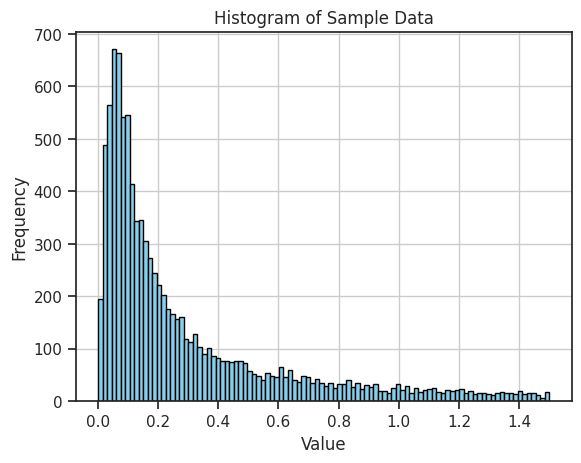

In [74]:
# See the distance of the SPLUS nad WISE source
# Plotting the histogram
plt.hist(combined_df["angDist"], bins=100, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.show()



In [75]:
for columns in combined_df.columns:
    print(columns)

Name
RAJ2000
DEJ2000
GLON
GLAT
SourceID
ePos
Class
pStar
pGalaxy
pNoise
imag
e_imag
imagAB
Elli
Classi
Deblendi
Saturatedi
Vignettedi
Traili
Truncatedi
BadPixi
MJDi
Seeingi
DetIDi
offRAi
offDEi
Hamag
e_Hamag
HamagAB
EllHa
ClassHa
DeblendHa
SaturatedHa
VignettedHa
TrailHa
TruncatedHa
BadPixHa
MJDHa
SeeingHa
DetIDHa
offRAHa
offDEHa
rImag
e_rImag
rImagAB
EllrI
ClassrI
DeblendrI
SaturatedrI
VignettedrI
TrailrI
TruncatedrI
BadPixrI
MJDrI
SeeingrI
DetIDrI
rUmag
e_rUmag
rUmagAB
EllrU
ClassrU
DeblendrU
SaturatedrU
VignettedrU
TrailrU
TruncatedrU
BadPixrU
MJDrU
SeeingrU
DetIDrU
offRArU
offDErU
gmag
e_gmag
gmagAB
Ellg
Classg
Deblendg
Saturatedg
Vignettedg
Trailg
Truncatedg
BadPixg
maskg
MJDg
Seeingg
DetIDg
offRAg
offDEg
Umag
e_Umag
EllU
ClassU
DeblendU
SaturatedU
VignettedU
TrailU
TruncatedU
BadPixU
MJDU
SeeingU
DetIDU
offRAU
offDEU
brightN
deblend
saturated
nBands
errBits
nObsI
nObsU
FieldIDI
FieldIDU
FieldGradeI
FieldGradeU
emitter
variable
SourceID2
imag2
e_imag2
Classi2
Seeingi2
MJDi2
offRAi

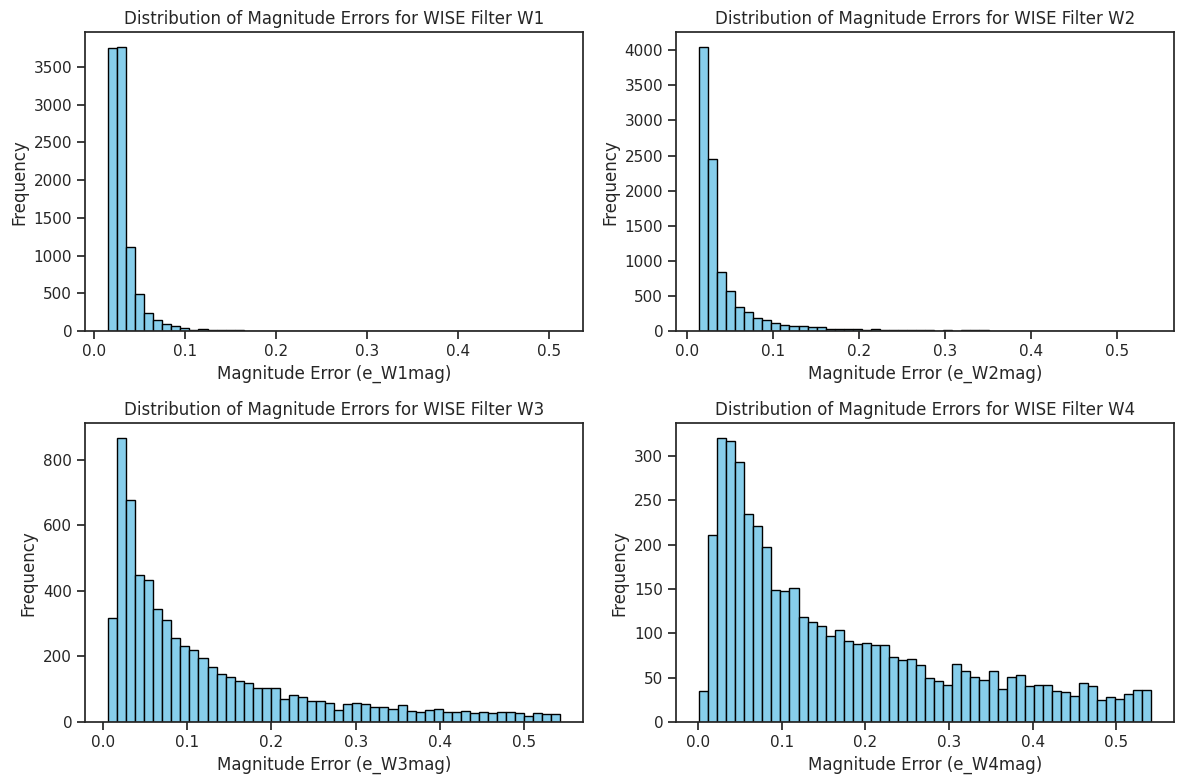

In [76]:
# Extract magnitude errors for WISE filters W1, W2, W3, W4
magnitude_errors_w1 = combined_df["e_W1mag"]
magnitude_errors_w2 = combined_df["e_W2mag"]
magnitude_errors_w3 = combined_df["e_W3mag"]
magnitude_errors_w4 = combined_df["e_W4mag"]

# Create subplots for each histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histogram for e_W1mag
axs[0, 0].hist(magnitude_errors_w1, bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of Magnitude Errors for WISE Filter W1')
axs[0, 0].set_xlabel('Magnitude Error (e_W1mag)')
axs[0, 0].set_ylabel('Frequency')

# Plot histogram for e_W2mag
axs[0, 1].hist(magnitude_errors_w2, bins=50, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Distribution of Magnitude Errors for WISE Filter W2')
axs[0, 1].set_xlabel('Magnitude Error (e_W2mag)')
axs[0, 1].set_ylabel('Frequency')

# Plot histogram for e_W3mag
axs[1, 0].hist(magnitude_errors_w3, bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Distribution of Magnitude Errors for WISE Filter W3')
axs[1, 0].set_xlabel('Magnitude Error (e_W3mag)')
axs[1, 0].set_ylabel('Frequency')

# Plot histogram for e_W4mag
axs[1, 1].hist(magnitude_errors_w4, bins=50, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Distribution of Magnitude Errors for WISE Filter W4')
axs[1, 1].set_xlabel('Magnitude Error (e_W4mag)')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [77]:
# Máximos errores permitidos (ajustables según necesidades)
max_err_optical = 0.2  # Para bandas ópticas (g, r, i, Hα, U)
max_err_wise = 0.5      # Para WISE (W1, W2)
max_err_2mass = 0.2     # Para 2MASS (J, H, K)

# Máscara de errores para IGAPS (óptico)
m_err_igaps = (
    (combined_df["e_imag"] <= max_err_optical) &
    (combined_df["e_Hamag"] <= max_err_optical) &
    (combined_df["e_rImag"] <= max_err_optical) &
    (combined_df["e_gmag"] <= max_err_optical) &
    (combined_df["e_Umag"] <= max_err_optical)  # Opcional si se usa UV
)

# Filtrado de flags de calidad (ej. eliminar saturados)
m_quality_igaps = (
    (combined_df["Saturatedi"] == 0) &
    (combined_df["BadPixi"] == 0) &
    (combined_df["Traili"] == 0)  # Aplica a todas las bandas relevantes
)

In [78]:
# Máscara de errores para WISE y 2MASS
m_err_wise_tmass = (
    (combined_df["e_W1mag"] <= max_err_wise) &
    (combined_df["e_W2mag"] <= max_err_wise) &
    (combined_df["e_Jmag"] <= max_err_2mass) &
    (combined_df["e_Hmag"] <= max_err_2mass) &
    (combined_df["e_Kmag"] <= max_err_2mass)
)


In [79]:
# Combinar todas las máscaras
mask_total = (
    m_err_igaps &
    m_quality_igaps &
    m_err_wise_tmass 
)

# Aplicar la máscara al DataFrame
df_filtered = combined_df[mask_total].copy()
df_filtered

,Name,RAJ2000,DEJ2000,GLON,GLAT,SourceID,ePos,Class,pStar,pGalaxy,...,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
0,J194407.42+302330.8,296.030917,30.391885,65.664704,3.196313,470950-3-22952,0.033,-1.0,1.00,0.00,...,0000,0,32nn,AACU,-83.0,104.0,-153.0,110.0,0.071,0.196844
3,J193737.05+291841.3,294.404389,29.311475,64.027520,3.894285,420815-3-7132,0.044,-1.0,1.00,0.00,...,dd00,0,nnnn,AAUU,NaN,NaN,NaN,NaN,0.303,0.296750
4,J193422.27+291439.8,293.592782,29.244383,63.625692,4.481705,420083-3-17125,0.043,99.0,0.00,1.00,...,dd00,0,nnnn,AAUU,NaN,NaN,NaN,NaN,0.367,0.259146
8,J194006.65+300124.9,295.027722,30.023586,64.915346,3.768859,455814-3-6029,0.048,99.0,1.00,0.00,...,0000,1,00nn,AAUU,-910.0,246.0,550.0,249.0,0.595,0.594496
10,J193331.61+300620.6,293.381688,30.105718,64.296195,5.055353,419728-3-12944,0.037,99.0,0.95,0.05,...,hhh0,0,nnnn,AAUU,NaN,NaN,NaN,NaN,0.306,0.327454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,J194657.47+291706.8,296.739465,29.285215,65.012424,2.111001,626263-3-22491,0.026,-1.0,1.00,0.00,...,00dD,1,31nn,AABB,-192.0,138.0,-15.0,114.0,0.691,0.675858
9810,J194631.32+291451.9,296.630484,29.247751,64.932234,2.174407,364539-1-2795,0.031,-1.0,1.00,0.00,...,0h00,0,000n,AAAC,-358.0,70.0,101.0,71.0,0.052,0.108804
9811,J194725.96+293304.7,296.858158,29.551299,65.294604,2.155432,398934-4-24535,0.038,-1.0,1.00,0.00,...,0hHH,0,31nn,AAUU,68.0,111.0,87.0,114.0,0.132,0.078484
9812,J194912.66+294740.1,297.302738,29.794486,65.699773,1.944719,534182-1-4440,0.018,-1.0,1.00,0.00,...,0000,1,00nn,AABC,8.0,60.0,-83.0,58.0,0.323,0.274081


In [80]:
#Selecting columns
columns = ["rImag",       # Magnitud en banda r (IPHAS)
    "Hamag",       # Magnitud en Hα (filtro estrecho)
    "gmag",        # Magnitud en banda g
    "imag",        # Magnitud en banda i
    "Umag",
    "W1mag",       # WISE 3.4 µm
    "W2mag",       # WISE 4.6 µm
    "Jmag",        # 2MASS J (1.25 µm)
    "Hmag",        # 2MASS H (1.65 µm)
    "Kmag"         # 2MASS Ks (2.17 µm)]
          ]

In [81]:
df_mag = df_filtered[columns]
df_mag

,rImag,Hamag,gmag,imag,Umag,W1mag,W2mag,Jmag,Hmag,Kmag
0,18.22,17.14,19.71,16.52,20.88,13.630,13.663,14.553,13.871,13.758
3,16.36,15.79,17.40,15.78,19.22,13.506,13.750,14.321,13.746,13.652
4,16.94,16.48,17.92,16.43,19.12,14.919,15.634,15.469,15.229,15.029
8,17.99,17.27,19.35,17.11,20.28,14.578,14.523,15.759,15.169,14.745
10,17.15,16.30,17.48,16.66,17.87,14.591,14.878,15.434,15.122,15.035
...,...,...,...,...,...,...,...,...,...,...
9809,16.09,15.59,17.30,15.44,18.81,13.322,13.402,14.219,13.597,13.471
9810,16.51,15.74,18.05,15.47,19.06,12.160,11.816,13.798,13.217,12.870
9811,15.72,15.32,16.49,15.28,17.62,13.799,14.147,14.282,13.905,13.793
9812,16.47,15.59,17.95,15.51,18.86,12.346,12.009,13.996,13.470,13.151


### Creating the colors 

In [82]:
# Generate all combinations of magnitude columns
color_index_pairs = list(combinations(df_mag, 2))
len(color_index_pairs)

45

In [83]:
def calculate_earnings(df, index_pairs):
    for index_pair in index_pairs:
        color_index_name = f"{index_pair[0]} - {index_pair[1]}"
        df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
    return df

In [84]:
df_colors_mag = calculate_earnings(df_mag, color_index_pairs)

/tmp/ipykernel_90100/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_90100/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_90100/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [85]:
df_colors_mag

,rImag,Hamag,gmag,imag,Umag,W1mag,W2mag,Jmag,Hmag,Kmag,...,W1mag - W2mag,W1mag - Jmag,W1mag - Hmag,W1mag - Kmag,W2mag - Jmag,W2mag - Hmag,W2mag - Kmag,Jmag - Hmag,Jmag - Kmag,Hmag - Kmag
0,18.22,17.14,19.71,16.52,20.88,13.630,13.663,14.553,13.871,13.758,...,-0.033,-0.923,-0.241,-0.128,-0.890,-0.208,-0.095,0.682,0.795,0.113
3,16.36,15.79,17.40,15.78,19.22,13.506,13.750,14.321,13.746,13.652,...,-0.244,-0.815,-0.240,-0.146,-0.571,0.004,0.098,0.575,0.669,0.094
4,16.94,16.48,17.92,16.43,19.12,14.919,15.634,15.469,15.229,15.029,...,-0.715,-0.550,-0.310,-0.110,0.165,0.405,0.605,0.240,0.440,0.200
8,17.99,17.27,19.35,17.11,20.28,14.578,14.523,15.759,15.169,14.745,...,0.055,-1.181,-0.591,-0.167,-1.236,-0.646,-0.222,0.590,1.014,0.424
10,17.15,16.30,17.48,16.66,17.87,14.591,14.878,15.434,15.122,15.035,...,-0.287,-0.843,-0.531,-0.444,-0.556,-0.244,-0.157,0.312,0.399,0.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,16.09,15.59,17.30,15.44,18.81,13.322,13.402,14.219,13.597,13.471,...,-0.080,-0.897,-0.275,-0.149,-0.817,-0.195,-0.069,0.622,0.748,0.126
9810,16.51,15.74,18.05,15.47,19.06,12.160,11.816,13.798,13.217,12.870,...,0.344,-1.638,-1.057,-0.710,-1.982,-1.401,-1.054,0.581,0.928,0.347
9811,15.72,15.32,16.49,15.28,17.62,13.799,14.147,14.282,13.905,13.793,...,-0.348,-0.483,-0.106,0.006,-0.135,0.242,0.354,0.377,0.489,0.112
9812,16.47,15.59,17.95,15.51,18.86,12.346,12.009,13.996,13.470,13.151,...,0.337,-1.650,-1.124,-0.805,-1.987,-1.461,-1.142,0.526,0.845,0.319


In [86]:
# Drop magnitudes
df_colors = df_colors_mag.drop(columns=columns)

In [87]:
df_colors

,rImag - Hamag,rImag - gmag,rImag - imag,rImag - Umag,rImag - W1mag,rImag - W2mag,rImag - Jmag,rImag - Hmag,rImag - Kmag,Hamag - gmag,...,W1mag - W2mag,W1mag - Jmag,W1mag - Hmag,W1mag - Kmag,W2mag - Jmag,W2mag - Hmag,W2mag - Kmag,Jmag - Hmag,Jmag - Kmag,Hmag - Kmag
0,1.08,-1.49,1.70,-2.66,4.590,4.557,3.667,4.349,4.462,-2.57,...,-0.033,-0.923,-0.241,-0.128,-0.890,-0.208,-0.095,0.682,0.795,0.113
3,0.57,-1.04,0.58,-2.86,2.854,2.610,2.039,2.614,2.708,-1.61,...,-0.244,-0.815,-0.240,-0.146,-0.571,0.004,0.098,0.575,0.669,0.094
4,0.46,-0.98,0.51,-2.18,2.021,1.306,1.471,1.711,1.911,-1.44,...,-0.715,-0.550,-0.310,-0.110,0.165,0.405,0.605,0.240,0.440,0.200
8,0.72,-1.36,0.88,-2.29,3.412,3.467,2.231,2.821,3.245,-2.08,...,0.055,-1.181,-0.591,-0.167,-1.236,-0.646,-0.222,0.590,1.014,0.424
10,0.85,-0.33,0.49,-0.72,2.559,2.272,1.716,2.028,2.115,-1.18,...,-0.287,-0.843,-0.531,-0.444,-0.556,-0.244,-0.157,0.312,0.399,0.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,0.50,-1.21,0.65,-2.72,2.768,2.688,1.871,2.493,2.619,-1.71,...,-0.080,-0.897,-0.275,-0.149,-0.817,-0.195,-0.069,0.622,0.748,0.126
9810,0.77,-1.54,1.04,-2.55,4.350,4.694,2.712,3.293,3.640,-2.31,...,0.344,-1.638,-1.057,-0.710,-1.982,-1.401,-1.054,0.581,0.928,0.347
9811,0.40,-0.77,0.44,-1.90,1.921,1.573,1.438,1.815,1.927,-1.17,...,-0.348,-0.483,-0.106,0.006,-0.135,0.242,0.354,0.377,0.489,0.112
9812,0.88,-1.48,0.96,-2.39,4.124,4.461,2.474,3.000,3.319,-2.36,...,0.337,-1.650,-1.124,-0.805,-1.987,-1.461,-1.142,0.526,0.845,0.319


***Making the color using some WISE filters***

In [88]:
for columns in df_colors.columns:
    print(columns)

rImag - Hamag
rImag - gmag
rImag - imag
rImag - Umag
rImag - W1mag
rImag - W2mag
rImag - Jmag
rImag - Hmag
rImag - Kmag
Hamag - gmag
Hamag - imag
Hamag - Umag
Hamag - W1mag
Hamag - W2mag
Hamag - Jmag
Hamag - Hmag
Hamag - Kmag
gmag - imag
gmag - Umag
gmag - W1mag
gmag - W2mag
gmag - Jmag
gmag - Hmag
gmag - Kmag
imag - Umag
imag - W1mag
imag - W2mag
imag - Jmag
imag - Hmag
imag - Kmag
Umag - W1mag
Umag - W2mag
Umag - Jmag
Umag - Hmag
Umag - Kmag
W1mag - W2mag
W1mag - Jmag
W1mag - Hmag
W1mag - Kmag
W2mag - Jmag
W2mag - Hmag
W2mag - Kmag
Jmag - Hmag
Jmag - Kmag
Hmag - Kmag


# Reduction dimensionality

## UMAP 

Given that there are 66 variables, we use UMAP. I think UMAP is the best option because these variables are probably not linearly correlated. [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional spaces. If you have 66 variables and suspect they are not linearly correlated, UMAP could be a suitable method for exploring the structure of your data in a lower-dimensional space while preserving non-linear relationships. However, the effectiveness of UMAP depends on various factors, including the nature of your data and the specific goals of your analysis. It's always a good idea to experiment with different techniques and evaluate their performance based on your data and objectives.

In [89]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_colors)

#### Try cross-validation 

To perform cross-validation for choosing the optimal number of components in UMAP.

In [90]:
# Split data into training and validation sets
X_train, X_val = train_test_split(X_stand, test_size=0.2, random_state=42)

In [91]:
# Define a range of number of components to try
num_components_range = [2, 3, 4, 5, 10, 20, 50]
n_neighbors_range = [5, 10, 20, 50, 100]

best_num_components = None
best_n_neighbors = None
best_silhouette_score = -1  # Initialize with a low value

In [92]:
# Loop over different numbers of components and neighbors
for num_components in num_components_range:
    for n_neighbors in n_neighbors_range:
        # Fit UMAP model
        reducer_ = umap.UMAP(n_neighbors=n_neighbors, n_components=num_components, random_state=42)
        X_train_trans = reducer_.fit_transform(X_train)

        # Cluster the transformed data using KMeans
        kmeans = KMeans(n_clusters=num_components, random_state=42)
        labels = kmeans.fit_predict(X_train_trans)

        # Evaluate performance on validation set using Silhouette Score
        silhouette = silhouette_score(X_train_trans, labels, random_state=42)
        print(f"Number of components: {num_components}, Number of neighbors: {n_neighbors}, Silhouette Score: {silhouette}")

        # Update best parameters if necessary
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_num_components = num_components
            best_n_neighbors = n_neighbors
            best_labels = labels

/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 5, Silhouette Score: 0.47480109333992004


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 10, Silhouette Score: 0.5153447389602661


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 20, Silhouette Score: 0.5284960269927979


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 50, Silhouette Score: 0.5258157849311829


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 100, Silhouette Score: 0.5271563529968262


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 5, Silhouette Score: 0.5092387795448303


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 10, Silhouette Score: 0.5017872452735901


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 20, Silhouette Score: 0.5142596960067749


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 50, Silhouette Score: 0.5169421434402466


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 100, Silhouette Score: 0.5201579928398132


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 5, Silhouette Score: 0.5242154002189636


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 10, Silhouette Score: 0.5311587452888489


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 20, Silhouette Score: 0.537951648235321


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 50, Silhouette Score: 0.5385934114456177


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 100, Silhouette Score: 0.5433989763259888


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 5, Silhouette Score: 0.4755136966705322


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 10, Silhouette Score: 0.44197431206703186


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 20, Silhouette Score: 0.4422621726989746


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 50, Silhouette Score: 0.44846734404563904


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 100, Silhouette Score: 0.45491471886634827


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 5, Silhouette Score: 0.399200439453125


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 10, Silhouette Score: 0.3876204788684845


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 20, Silhouette Score: 0.3871007561683655


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 50, Silhouette Score: 0.4057101905345917


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 100, Silhouette Score: 0.4144383370876312


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 5, Silhouette Score: 0.37833091616630554


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 10, Silhouette Score: 0.3748597502708435


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 20, Silhouette Score: 0.36860209703445435


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 50, Silhouette Score: 0.4017113447189331


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 100, Silhouette Score: 0.37467139959335327


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 5, Silhouette Score: 0.3914925158023834


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 10, Silhouette Score: 0.3861621022224426


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 20, Silhouette Score: 0.38199666142463684


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 50, Silhouette Score: 0.3540782034397125


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 100, Silhouette Score: 0.3560022711753845


In [94]:
# Output best parameters and corresponding silhouette score
print(f"Best number of components: {best_num_components}, Best number of neighbors: {best_n_neighbors}, Best Silhouette Score: {best_silhouette_score}")

Best number of components: 4, Best number of neighbors: 100, Best Silhouette Score: 0.5433989763259888


#### Try UMAP

In [95]:
num_components = 4
reducer = umap.UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=num_components,  # min_samples=15, min_cluster_size=60
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)

/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Visualize the cumulative explained variance ratio:

In [96]:
# Calculate the variance of the original data points in the reduced space
original_variance = np.var(X_trans, axis=0)

# Calculate the explained variance ratio
explained_variance_ratio = original_variance / np.sum(original_variance)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

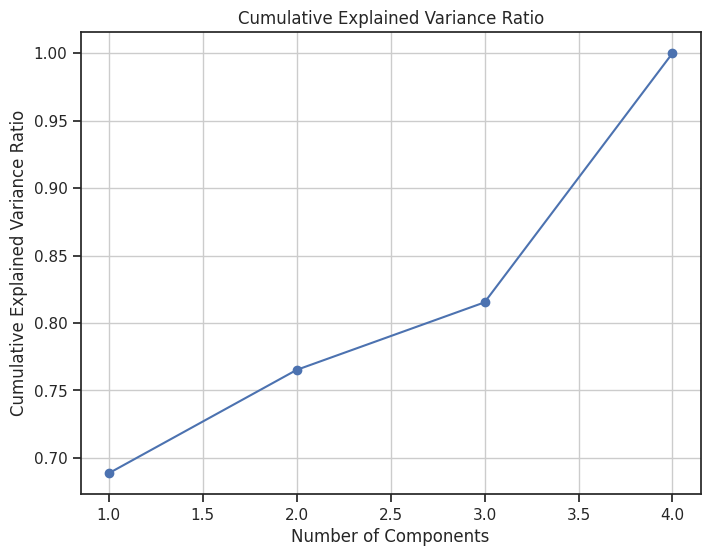

In [97]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [98]:
#umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
# Create a DataFrame for PCA results
umap_columns = [f'PC{i}' for i in range(1, num_components + 1)]
umap_df = pd.DataFrame(data=X_trans, columns=umap_columns)
umap_df

,PC1,PC2,PC3,PC4
0,9.486602,1.028074,4.913471,7.548848
1,5.096829,1.982129,7.104471,6.039470
2,3.520607,2.701888,7.412767,6.339821
3,6.175920,2.460991,7.718352,5.037620
4,2.113765,4.219904,8.169669,6.239161
...,...,...,...,...
5286,4.990423,2.045132,7.214571,5.982069
5287,8.392490,2.096288,7.726262,4.127986
5288,3.100461,2.926624,7.497234,6.421690
5289,7.430367,2.639959,7.962253,4.249512


/tmp/ipykernel_90100/824404214.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 10))


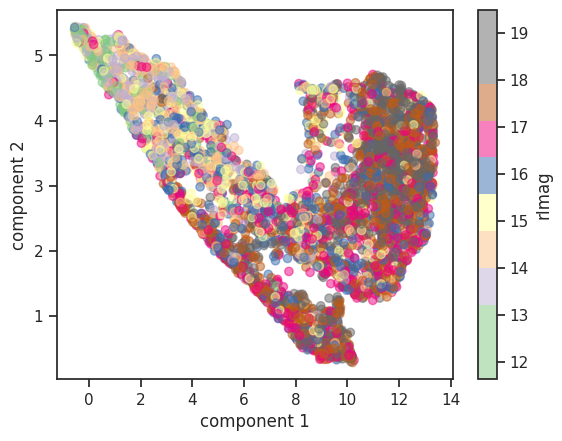

In [99]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC2"],
            c=df_filtered["rImag"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label='rImag')  # Set the label of the color bar to 'g_PStotal'
plt.show()

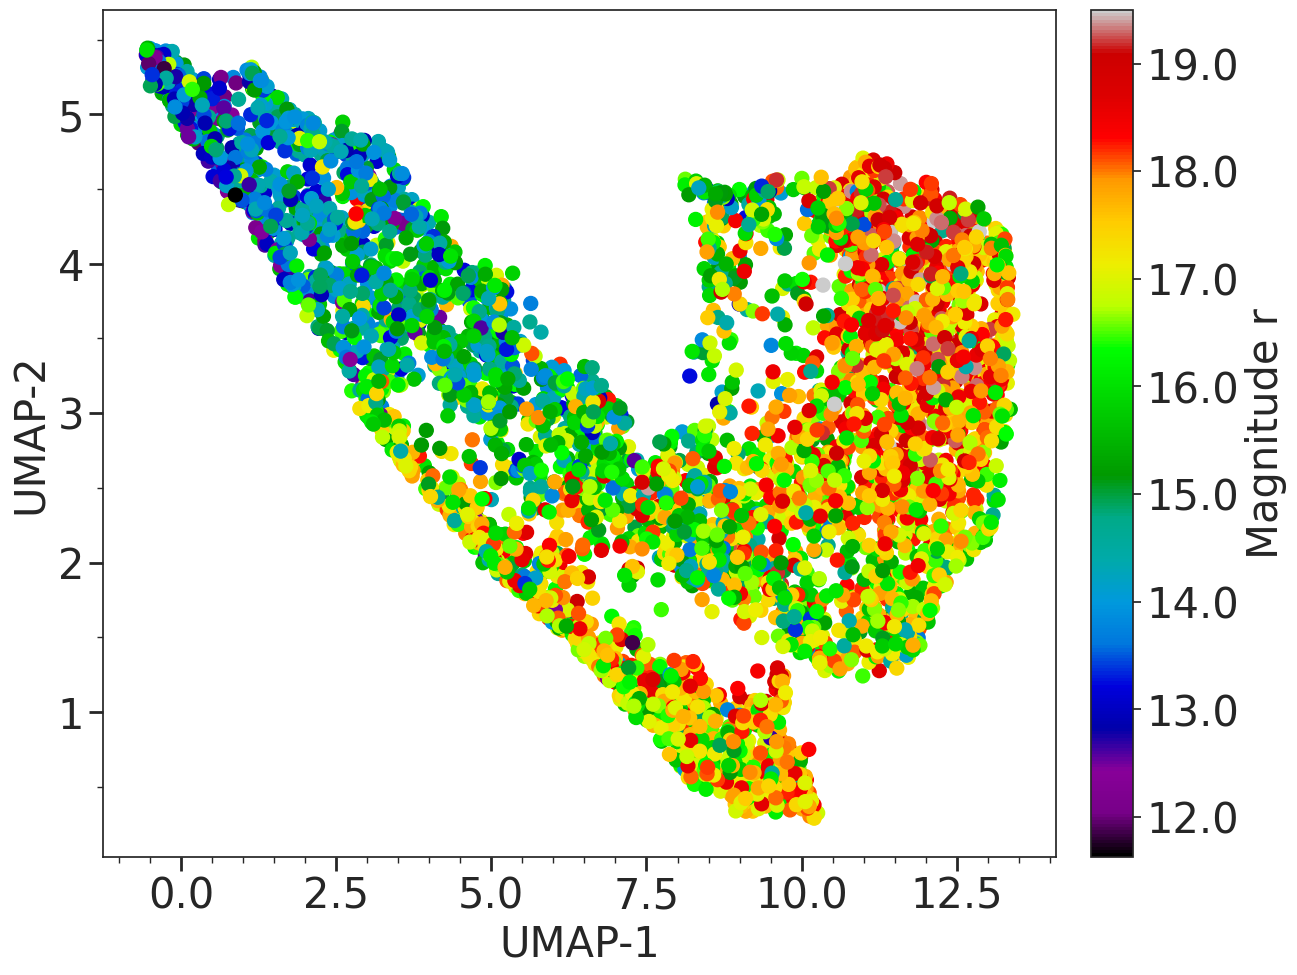

In [100]:
from matplotlib.ticker import MultipleLocator, NullFormatter

# Plotting
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    plt.xlabel("UMAP-1", fontsize=30)
    plt.ylabel("UMAP-2", fontsize=30)
    plt.tick_params(axis='x', labelsize=30, width=2, length=10)  # Adjusting width of tick marks
    plt.tick_params(axis='y', labelsize=30, width=2, length=10)  # Adjusting width of tick marks

    # Create a scatter plot
    sc = ax.scatter(umap_df["PC1"], umap_df["PC2"], c=df_filtered["rImag"], cmap="nipy_spectral", s=100)
    
    # Add minor tick locators without showing the minor ticks
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())

    # Add a colorbar with improved visibility
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    cbar.set_label("Magnitude r", fontsize=30)  # Provide a label for the colorbar
    cbar.ax.tick_params(labelsize=30)  # Adjust the size of the tick labels

#plt.savefig("../Figs/umap_splus_wise.pdf")

## HDBSCAN 

#### Find the best parameters 

To find the best min_samples and min_cluster_size parameters for HDBSCAN, you typically perform a grid search over a range of values and evaluate the clustering performance using a metric such as silhouette score or another relevant metric.

Here's a general approach you can follow:

    Define a grid of parameters to search over for min_samples and min_cluster_size.
    For each combination of parameters:
        Fit HDBSCAN to your data.
        Evaluate the clustering performance using a metric such as silhouette score.
    Select the parameters that result in the highest clustering performance according to your chosen metric.

Here's how you can perform this grid search:

In [101]:

# Define the range of values for min_samples and min_cluster_size
min_samples_range = [5, 10, 15, 20, 25, 30, 35]  # Adjust as needed
min_cluster_size_range = [40, 50, 60, 80, 100, 120, 150]  # Adjust as needed

In [102]:
best_score = -1
best_params = {}


In [103]:
for min_samples in min_samples_range:
    for min_cluster_size in min_cluster_size_range:
        # Fit HDBSCAN with the current parameters
        clusterer_ = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        labels = clusterer_.fit_predict(X_trans)  # X is your data
        
        # Evaluate clustering performance using silhouette score
        silhouette_ = silhouette_score(X_trans, labels)
        
        # Check if current parameters result in a better silhouette score
        if silhouette_ > best_score:
            best_score = silhouette_
            best_params['min_samples'] = min_samples
            best_params['min_cluster_size'] = min_cluster_size

In [105]:
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'min_samples': 25, 'min_cluster_size': 150}
Best silhouette score: 0.3161933


### Applying HDBSCAN 

I foun that the best configurations of parameteres are 'min_samples': 5 and 'min_cluster_size': 100. We try then: 
But first try this min_samples=15, min_cluster_size=60

In [142]:
clusterer = hdbscan.HDBSCAN(min_samples=30, min_cluster_size=80, prediction_data=True, gen_min_span_tree=True)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1, gen_min_span_tree=True)


In [143]:

clusterer.fit(X_trans)
labels = clusterer.labels_

In [144]:
clusterer.metric

'euclidean'

In [145]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_cluster3 = list(labels).count(3)
n_cluster4 = list(labels).count(4)
n_cluster5 = list(labels).count(5)
n_noise_ = list(labels).count(-1)


In [146]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of cluster points 3: %d' % n_cluster3)
print('Estimated number of cluster points 4: %d' % n_cluster4)
print('Estimated number of cluster points 5: %d' % n_cluster5)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 7
Estimated number of cluster points 0: 141
Estimated number of cluster points 1: 2437
Estimated number of cluster points 2: 233
Estimated number of cluster points 3: 133
Estimated number of cluster points 4: 255
Estimated number of cluster points 5: 164
Estimated number of noise points: 1626


<Axes: >

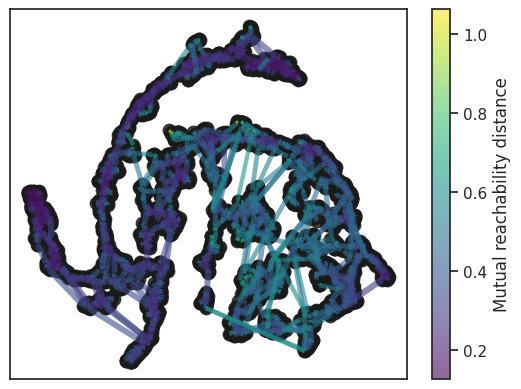

In [147]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)


### Build the cluster hierarchy 

<Axes: ylabel='distance'>

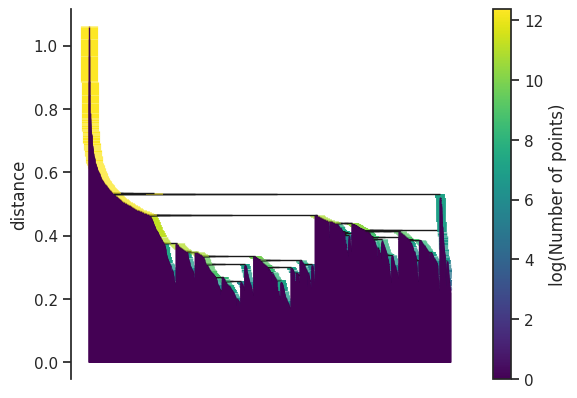

In [148]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Extract the clusters

<Axes: ylabel='$\\lambda$ value'>

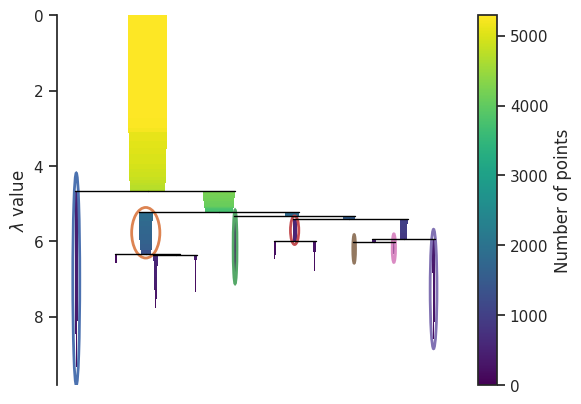

In [60]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

Plting the components

<Axes: xlabel='PC1', ylabel='PC2'>

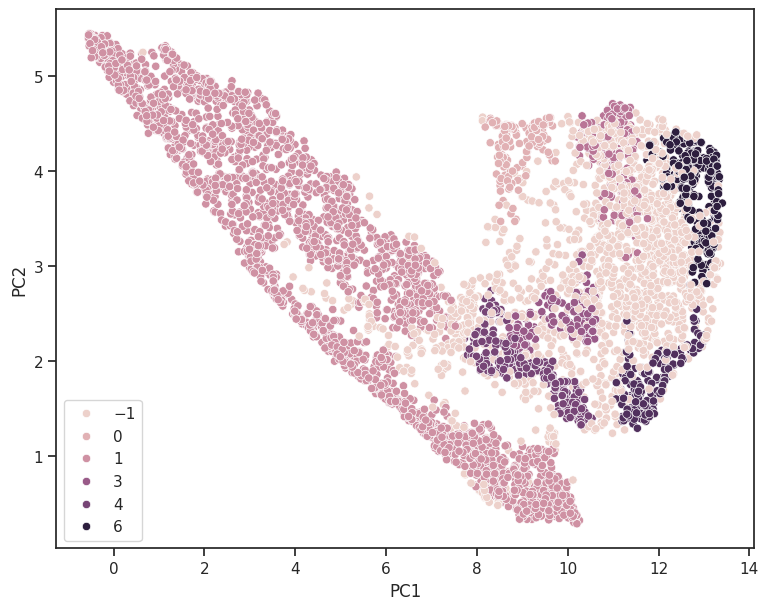

In [149]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC2"], 
                hue=labels,
                )

By resetting the indexes with reset_index(drop=True), you ensure that each DataFrame's index starts from 0, effectively aligning the rows properly for concatenation. Then you can concatenate them horizontally without encountering issues due to mismatched indexes.

In [156]:
# Concatenat the original claen table with the umap results
df_filtered.reset_index(drop=True, inplace=True)
umap_df.reset_index(drop=True, inplace=True)
df_cleanErr_umap = pd.concat([df_filtered, umap_df], axis=1)

Create the tables for each clase

In [157]:
df_cleanErr_umap["Label"] = labels

In [158]:
df_cleanErr_umap

,Name,RAJ2000,DEJ2000,GLON,GLAT,SourceID,ePos,Class,pStar,pGalaxy,...,e_pmRA,pmDE,e_pmDE,d2M,angDist,PC1,PC2,PC3,PC4,Label
0,J194407.42+302330.8,296.030917,30.391885,65.664704,3.196313,470950-3-22952,0.033,-1.0,1.00,0.00,...,104.0,-153.0,110.0,0.071,0.196844,9.486602,1.028074,4.913471,7.548848,1
1,J193737.05+291841.3,294.404389,29.311475,64.027520,3.894285,420815-3-7132,0.044,-1.0,1.00,0.00,...,NaN,NaN,NaN,0.303,0.296750,5.096829,1.982129,7.104471,6.039470,1
2,J193422.27+291439.8,293.592782,29.244383,63.625692,4.481705,420083-3-17125,0.043,99.0,0.00,1.00,...,NaN,NaN,NaN,0.367,0.259146,3.520607,2.701888,7.412767,6.339821,1
3,J194006.65+300124.9,295.027722,30.023586,64.915346,3.768859,455814-3-6029,0.048,99.0,1.00,0.00,...,246.0,550.0,249.0,0.595,0.594496,6.175920,2.460991,7.718352,5.037620,1
4,J193331.61+300620.6,293.381688,30.105718,64.296195,5.055353,419728-3-12944,0.037,99.0,0.95,0.05,...,NaN,NaN,NaN,0.306,0.327454,2.113765,4.219904,8.169669,6.239161,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,J194657.47+291706.8,296.739465,29.285215,65.012424,2.111001,626263-3-22491,0.026,-1.0,1.00,0.00,...,138.0,-15.0,114.0,0.691,0.675858,4.990423,2.045132,7.214571,5.982069,1
5287,J194631.32+291451.9,296.630484,29.247751,64.932234,2.174407,364539-1-2795,0.031,-1.0,1.00,0.00,...,70.0,101.0,71.0,0.052,0.108804,8.392490,2.096288,7.726262,4.127986,4
5288,J194725.96+293304.7,296.858158,29.551299,65.294604,2.155432,398934-4-24535,0.038,-1.0,1.00,0.00,...,111.0,87.0,114.0,0.132,0.078484,3.100461,2.926624,7.497234,6.421690,1
5289,J194912.66+294740.1,297.302738,29.794486,65.699773,1.944719,534182-1-4440,0.018,-1.0,1.00,0.00,...,60.0,-83.0,58.0,0.323,0.274081,7.430367,2.639959,7.962253,4.249512,1


**Preliminary conlusions**\\
Wiht the parameters recomended by the Silhouette HDBSCAM fin two group, on which one corresponds to the EB. BUt using (min_samples=5, min_cluster_size=60 HDBCAM find four group one coressponds to to the EB, aother to CV and QSOS and AGN, and the other two to QSOS each one corresnp a specific redshift.

In [159]:
# Group the data based on the "Label" column
grouped_data = df_cleanErr_umap.groupby("Label")

In [160]:
# Define the directory where you want to save the CSV files
directory = '../Class_wise/'

In [161]:
# Iterate over each group
for label, group_df in grouped_data:
    if label == -1:  # Noise points
        filename = f'Halpha_emitter_wise_noise.csv'
    else:
        filename = f'Halpha_emitter_wise_group{label}.csv'
    group_df.to_csv(directory + filename, index=False)